<a href="https://colab.research.google.com/github/ruhullahil/gcolab/blob/master/DMLab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
wineData = pd.read_csv('/content/winequality-red.csv',delimiter=';')


In [0]:
wineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
import numpy as np
wineData = wineData.replace('?',np.NaN)
print('Number of instances = %d' % (wineData.shape[0]))
print('Number of attributes = %d' % (wineData.shape[1]))
print('Number of missing values:')
for col in wineData.columns:
  print('\t%s: %d' % (col,wineData[col].isna().sum()))


Number of instances = 1599
Number of attributes = 12
Number of missing values:
	fixed acidity: 0
	volatile acidity: 0
	citric acid: 0
	residual sugar: 0
	chlorides: 0
	free sulfur dioxide: 0
	total sulfur dioxide: 0
	density: 0
	pH: 0
	sulphates: 0
	alcohol: 0
	quality: 0


In [0]:
wineData2 = pd.read_csv('winequality-red.csv',delimiter=';')
wineData2 = wineData['citric acid']
print('Before replacing missing values:')
print(wineData2[20:25])
wineData2 = wineData2.fillna(wineData2.median())
print('\nAfter replacing missing values:')
print(wineData2[20:25])

Before replacing missing values:
20    0.48
21    0.31
22    0.21
23    0.11
24    0.14
Name: citric acid, dtype: float64

After replacing missing values:
20    0.48
21    0.31
22    0.21
23    0.11
24    0.14
Name: citric acid, dtype: float64


In [0]:
print('Number of rows in original data = %d' % (wineData.shape[0]))
wineData2 = wineData.dropna()
print('Number of rows after discarding missing values = %d' % (wineData2.shape[0
]))

Number of rows in original data = 1599
Number of rows after discarding missing values = 1599


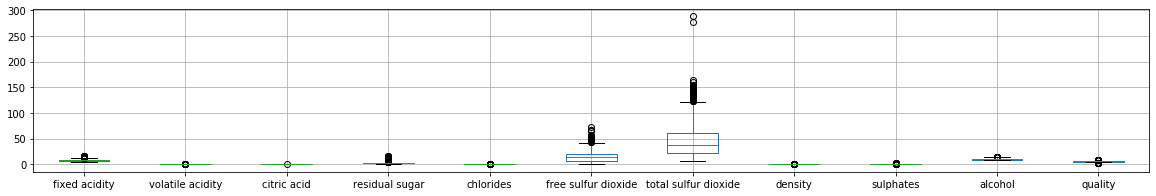

In [0]:
%matplotlib inline
wineData2 = wineData.drop(['pH'],axis=1)
wineData2['chlorides'] = pd.to_numeric(wineData2['chlorides'])
wineData2.boxplot(figsize=(20,3))

In [0]:
wineData2.cov()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
fixed acidity,3.031416,-0.079851,0.227820,0.281756,0.007679,-2.800921,-6.482346,0.002195,0.054010,-0.114421,0.174424
volatile acidity,-0.079851,0.032062,-0.019272,0.000484,0.000517,-0.019674,0.450426,0.000007,-0.007921,-0.038600,-0.056476
citric acid,0.227820,-0.019272,0.037947,0.039434,0.001869,-0.124252,0.227697,0.000134,0.010328,0.022815,0.035612
residual sugar,0.281756,0.000484,0.039434,1.987897,0.003690,2.758611,9.416441,0.000945,0.001321,0.063219,0.015635
chlorides,0.007679,0.000517,0.001869,0.003690,0.002215,0.002738,0.073387,0.000018,0.002962,-0.011092,-0.004900
free sulfur dioxide,-2.800921,-0.019674,-0.124252,2.758611,0.002738,109.414884,229.737521,-0.000433,0.091592,-0.773698,-0.427907
total sulfur dioxide,-6.482346,0.450426,0.227697,9.416441,0.073387,229.737521,1082.102373,0.004425,0.239471,-7.209298,-4.917237
density,0.002195,0.000007,0.000134,0.000945,0.000018,-0.000433,0.004425,0.000004,0.000048,-0.000998,-0.000267
sulphates,0.054010,-0.007921,0.010328,0.001321,0.002962,0.091592,0.239471,0.000048,0.028733,0.016907,0.034413
alcohol,-0.114421,-0.038600,0.022815,0.063219,-0.011092,-0.773698,-7.209298,-0.000998,0.016907,1.135647,0.409789


Text(0.5, 1.0, 'Aggregation (variance = 0.0000)')

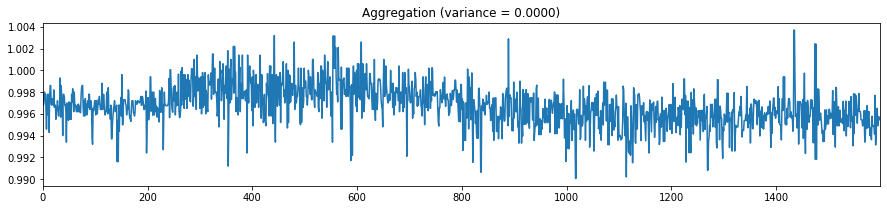

In [0]:
data = wineData2['density']
ax = data.plot(kind='line',figsize=(15,3))
ax.set_title('Aggregation (variance = %.4f)' % (data.var()))




In [0]:
sample = wineData.sample(frac=0.01, replace=True, random_state=1)
sample

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1061,9.1,0.400,0.50,1.80,0.071,7.0,16.0,0.99462,3.21,0.69,12.5,8
235,7.2,0.630,0.00,1.90,0.097,14.0,38.0,0.99675,3.37,0.58,9.0,6
1096,6.6,0.725,0.09,5.50,0.117,9.0,17.0,0.99655,3.35,0.49,10.8,6
905,9.2,0.580,0.20,3.00,0.081,15.0,115.0,0.99800,3.23,0.59,9.5,5
715,7.2,0.490,0.18,2.70,0.069,13.0,34.0,0.99670,3.29,0.48,9.2,6
847,7.4,0.680,0.16,1.80,0.078,12.0,39.0,0.99770,3.50,0.70,9.9,6
960,8.5,0.470,0.27,1.90,0.058,18.0,38.0,0.99518,3.16,0.85,11.1,6
144,5.2,0.340,0.00,1.80,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6
129,6.1,0.380,0.15,1.80,0.072,6.0,19.0,0.99550,3.42,0.57,9.4,5
749,7.3,0.510,0.18,2.10,0.070,12.0,28.0,0.99768,3.52,0.73,9.5,6


In [0]:
Z = (wineData2-wineData2.mean())/wineData2.std()
Z[20:25]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
20,0.333332,-1.719094,1.073014,-0.524002,-0.222383,1.254769,0.411372,0.028252,-0.756009,-0.959946,0.450707
21,-0.413324,-0.769690,0.200329,-0.169374,-0.116148,0.681164,0.745766,0.770039,-0.048074,-0.678432,-0.787576
22,-0.241019,-0.546301,-0.313015,-0.665853,0.393782,-0.561648,-0.287816,-0.077718,1.485786,-0.866108,-0.787576
23,0.103591,-0.211217,-0.826359,-0.169374,-0.073654,-0.657248,0.624168,0.028252,-0.756009,-0.959946,-0.787576
24,-0.815370,-0.713843,-0.672355,-0.098449,-0.052407,0.489962,-0.196617,0.028252,-0.166063,-0.678432,0.450707
